<h1>Retail Analysis of Walmart Data</h1>
<p><b>Problem Description</b><br>
One of the leading retail stores in the US, Walmart, would like to predict the sales and
demand accurately. There are certain events and holidays which impact sales on each day.
There are sales data available for 45 stores of Walmart. The business is facing a challenge
due to unforeseen demands and runs out of stock some times, due to the inappropriate
machine learning algorithm. An ideal ML algorithm will predict demand accurately and
ingest factors like economic conditions including CPI, Unemployment Index, etc.
Walmart runs several promotional markdown events throughout the year. These markdowns
precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day,
Thanksgiving, and Christmas. The weeks including these holidays are weighted five times
higher in the evaluation than non-holiday weeks. Part of the challenge presented by this
competition is modeling the effects of markdowns on these holiday weeks in the absence of
complete/ideal historical data. Historical sales data for 45 Walmart stores located in different
regions are available.

<b>Dataset Description</b><br>
This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file<br>
Walmart_Store_sales. Within this file you will find the following fields:<br>
Store - the store number <br>
Date - the week of sales <br>
Weekly_Sales - sales for the given store <br>
Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday
week<br>
Temperature - Temperature on the day of sale<br>
Fuel_Price - Cost of fuel in the region<br>
CPI – Prevailing consumer price index<br>
Unemployment - Prevailing unemployment rate<br>

Holiday Events<br>
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13 Labour Day: 10-Sep-10, 9-Sep-11,
7-Sep-12, 6-Sep-13 Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13 Christmas:
31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13</p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from matplotlib import dates
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('/content/Walmart_Store_sales.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
data.shape

(6435, 8)

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [7]:
data['Date'] = pd.to_datetime(data['Date'])
print(data['Date'].dtype)

datetime64[ns]


In [8]:
print(data['Date'][:1])
print(pd.DatetimeIndex(data['Date'][:1]).day)
print(pd.DatetimeIndex(data['Date'][:1]).month)
print(pd.DatetimeIndex(data['Date'][:1]).year)

0   2010-05-02
Name: Date, dtype: datetime64[ns]
Int64Index([2], dtype='int64', name='Date')
Int64Index([5], dtype='int64', name='Date')
Int64Index([2010], dtype='int64', name='Date')


In [9]:
# Creating new columns for day, month and year
data['Day'] = pd.DatetimeIndex(data['Date']).day
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Year'] = pd.DatetimeIndex(data['Date']).year
data.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
4495,32,2011-04-15,1120508.14,0,45.97,3.611,192.422595,8.595,15,4,2011
5570,39,2012-09-14,1447614.08,0,76.71,3.717,221.260121,6.623,14,9,2012
4811,34,2011-11-11,991570.02,0,41.04,3.286,129.816710,10.148,11,11,2011
1373,10,2011-09-30,1627707.31,0,82.27,3.877,129.606067,8.257,30,9,2011
3380,24,2011-04-11,1385860.38,0,39.87,3.738,136.475129,8.454,11,4,2011


### Basic statistical tasks

#### Which store has maximum sales

In [10]:
# Summing the store sales using group by function
totalsales_eachstore = data.groupby('Store')['Weekly_Sales'].sum().sort_values()
print("Store with minimum sales\n", totalsales_eachstore.head(1))
print("\nStore with maximum sales\n",totalsales_eachstore.tail(1))

Store with minimum sales
 Store
33    37160221.96
Name: Weekly_Sales, dtype: float64

Store with maximum sales
 Store
20    3.013978e+08
Name: Weekly_Sales, dtype: float64


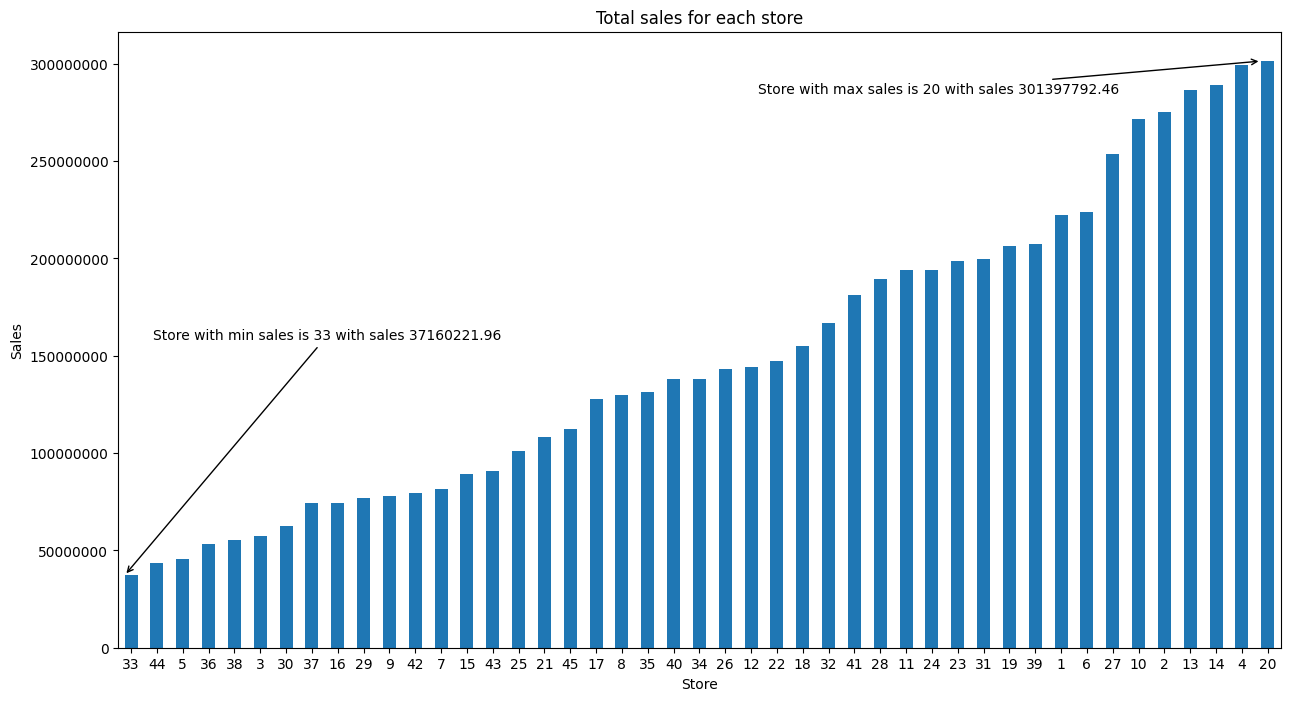

In [11]:
plt.figure(figsize=(15,8))
plt.title('Total sales for each store')
ax = totalsales_eachstore.plot(kind='bar')
p = ax.patches[0]
plt.annotate(f"Store with min sales is 33 with sales {p.get_height()}",
             xy=(p.get_x(), p.get_height()),
             xytext=(0.03,0.5),
             textcoords = 'axes fraction',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3'),
            )
p = ax.patches[44]
plt.annotate(f"Store with max sales is 20 with sales {p.get_height()}",
             xy=(p.get_x(), p.get_height()),
             xytext=(0.55,0.9),
             textcoords = 'axes fraction',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3'),
            )
plt.xlabel('Store')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

#### Which store has maximum standard deviation
i.e., Where the sales vary a lot. Also find out the mean to standard deviation

Store with maximum standard deviation is 14 with sales 317569.9


<Axes: title={'center': 'Distribution of weekly sales data for store 14'}, xlabel='Weekly_Sales', ylabel='Density'>

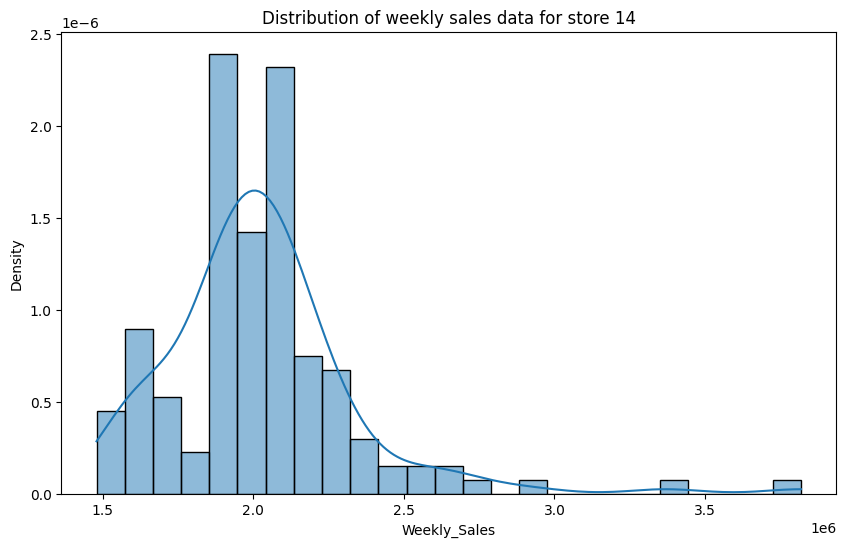

In [12]:
data_std = pd.DataFrame(data.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))
max_std_score = data_std.head(1)
print(f'Store with maximum standard deviation is {max_std_score.index[0]} with sales {max_std_score.Weekly_Sales[max_std_score.index[0]]:.1f}')
# Distribution
plt.figure(figsize=(10,6))
plt.title(f"Distribution of weekly sales data for store {max_std_score.index[0]}")
sns.histplot(data[data['Store'] == max_std_score.index[0]]['Weekly_Sales'], kde=True, stat="density")

In [13]:
# Coefficient of mean to standard deviation
mean_to_std = pd.DataFrame(data.groupby('Store')['Weekly_Sales'].std()/data.groupby('Store')['Weekly_Sales'].mean())
mean_to_std.head()

,Weekly_Sales
Store,
1,0.100292
2,0.123424
3,0.115021
4,0.127083
5,0.118668


#### Which store has good quarterly growth rate in Q3'2012

<Axes: xlabel='Store'>

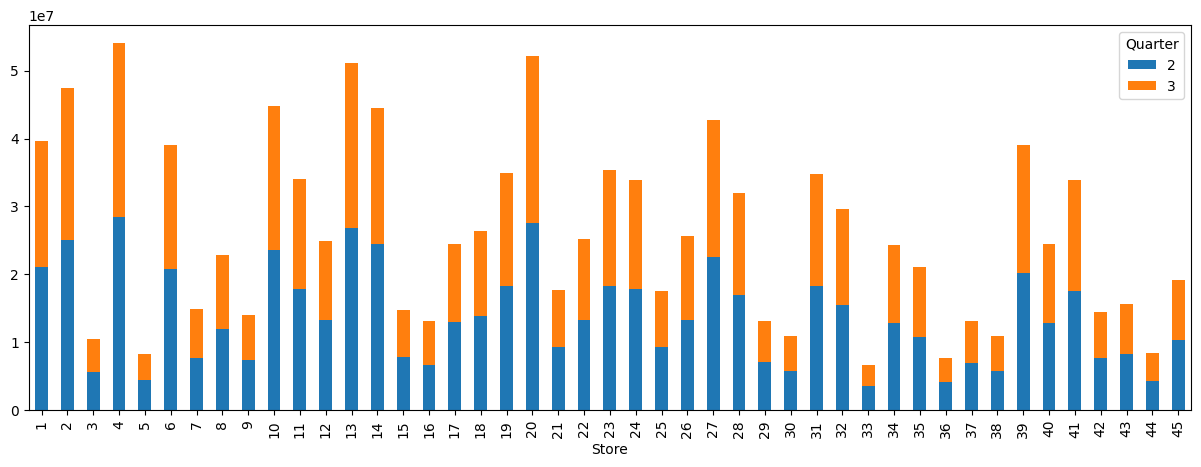

In [14]:
data['Quarter'] = data['Date'].dt.quarter
data_2012 = data.query('Year==2012')
data_2012_qs = data_2012.groupby(['Store', 'Quarter'])['Weekly_Sales'].sum().unstack()
data_2012_qs[[2,3]].sort_index().plot(kind='bar', stacked=True, figsize=(15,5))

In [15]:
# Growth rate
growth = (data_2012_qs[3] - data_2012_qs[2])
data_2012_qs['Growth Rate'] = (growth/ data_2012_qs[2]) * 100
data_2012_qs.sort_values(by='Growth Rate',ascending=False)['Growth Rate'].head()

Store
16   -2.789294
7    -3.824738
35   -4.663086
26   -6.057624
39   -6.396875
Name: Growth Rate, dtype: float64


Growth rates of stores for Quarter 4 compared to Quarter 3

#### Holidays which have higher sales than the mean sales in non holiday season for all stores

Given holiday events
- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

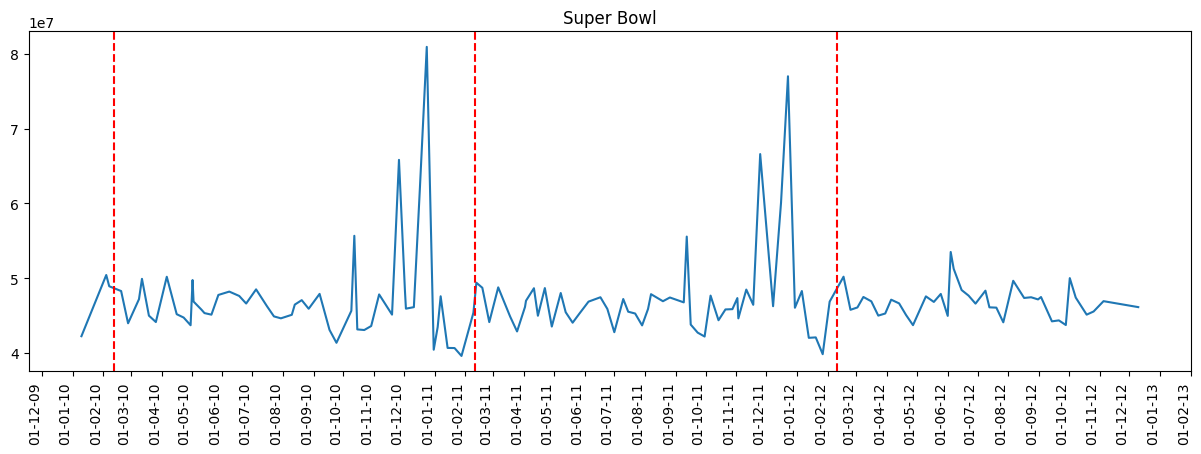

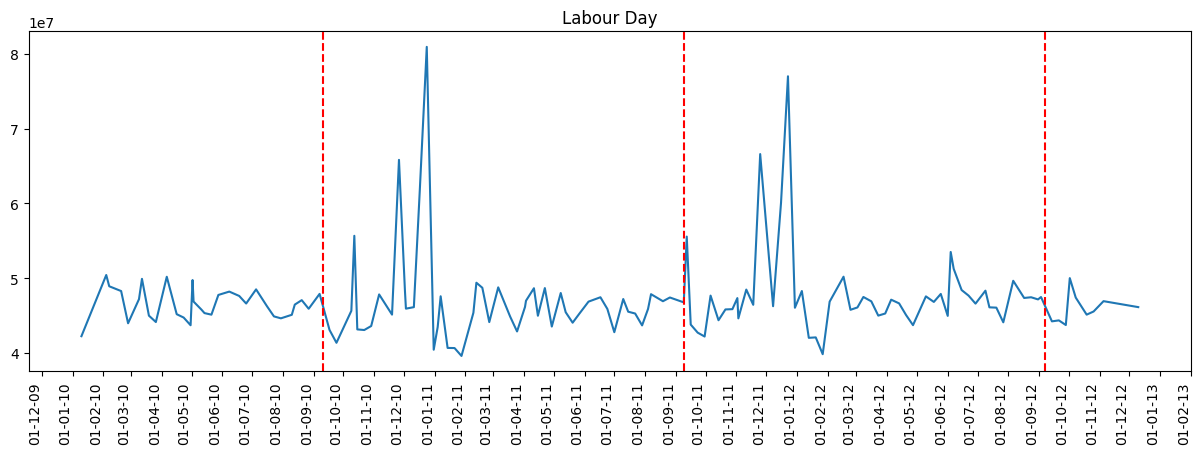

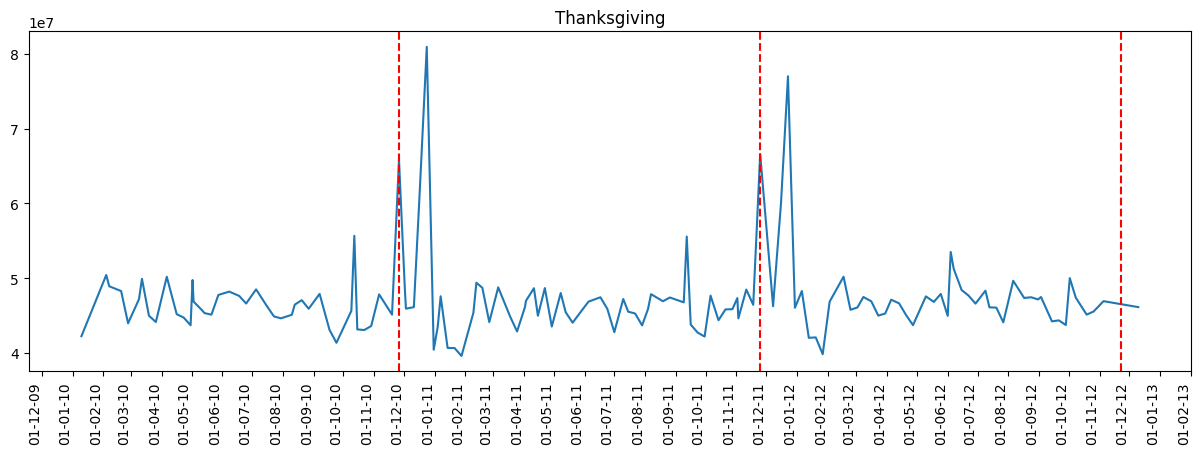

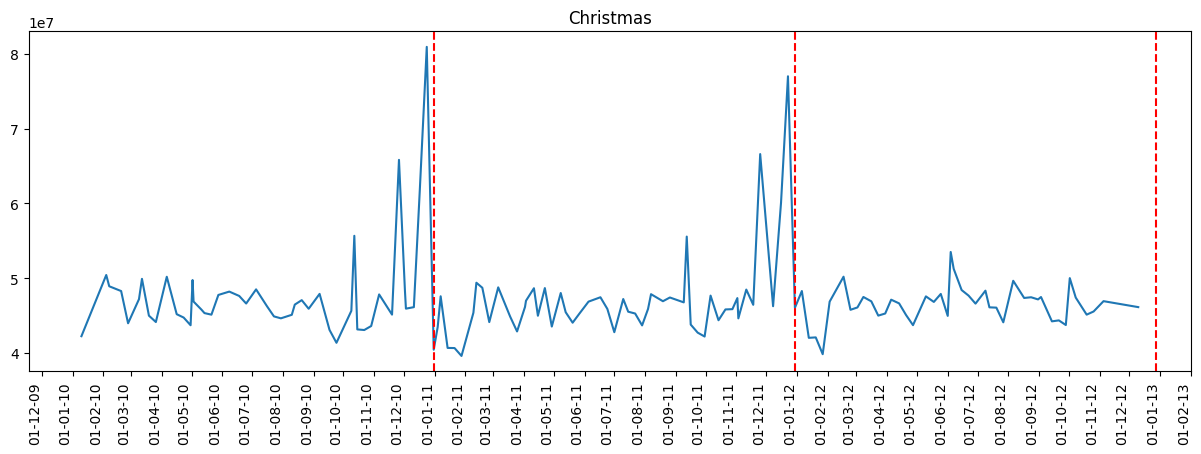

In [16]:
total_sales = data.groupby('Date')['Weekly_Sales'].sum().reset_index()
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

def plot_data(data, holiday, holiday_dates):
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(data['Date'], data['Weekly_Sales'],label=holiday)
    for day in holiday_dates:
        day = datetime.strptime(day, '%d-%m-%Y')
        plt.axvline(x=day, linestyle='--', c='r')

    plt.title(holiday)
    x_dates = data['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
    xfmt = dates.DateFormatter('%d-%m-%y')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.set_major_locator(dates.DayLocator(1))
    plt.gcf().autofmt_xdate(rotation=90)
    plt.show()

plot_data(total_sales, 'Super Bowl', Super_Bowl)
plot_data(total_sales, 'Labour Day', Labour_Day)
plot_data(total_sales, 'Thanksgiving', Thanksgiving)
plot_data(total_sales, 'Christmas', Christmas)

The sales are increased in *Thanksgiving* holidays and decreased in *Christmas* holidays

<Axes: title={'center': 'Yearly sales in holidays'}, xlabel='Year', ylabel='Sales'>

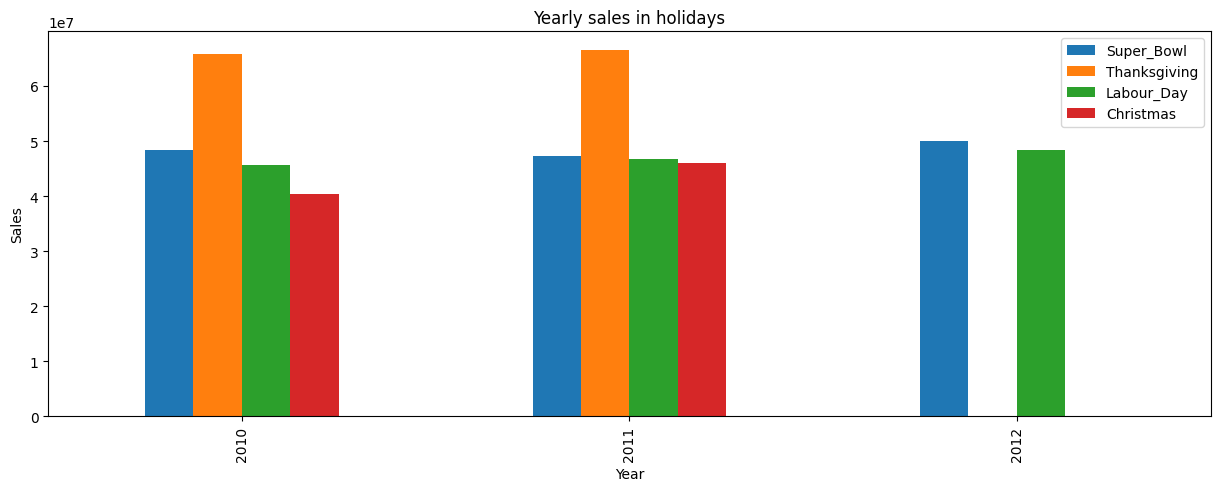

In [17]:
holiday_sales = pd.DataFrame()
holiday_sales['Super_Bowl'] = data[data['Date'].isin(Super_Bowl)].groupby('Year')['Weekly_Sales'].sum()
holiday_sales['Thanksgiving'] = data[data['Date'].isin(Thanksgiving)].groupby('Year')['Weekly_Sales'].sum()
holiday_sales['Labour_Day'] = data[data['Date'].isin(Labour_Day)].groupby('Year')['Weekly_Sales'].sum()
holiday_sales['Christmas'] = data[data['Date'].isin(Christmas)].groupby('Year')['Weekly_Sales'].sum()

holiday_sales.fillna(0, inplace=True)
holiday_sales.plot(kind='bar', figsize=(15,5), xlabel='Year', ylabel='Sales', title='Yearly sales in holidays')

#### Monthly and semester view of sales in units and insights

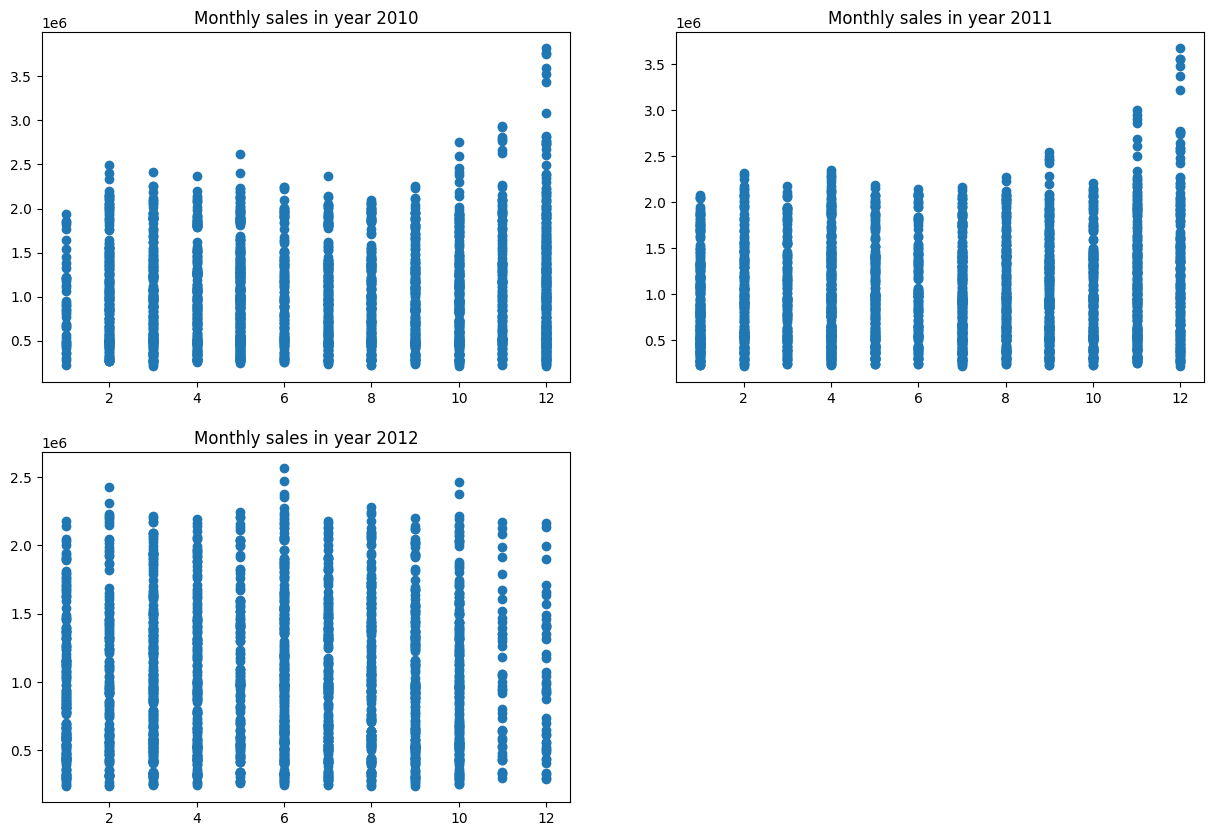

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.title("Monthly sales in year 2010")
plt.scatter(data[data.Year == 2010]["Month"], data[data.Year == 2010]["Weekly_Sales"])
plt.subplot(222)
plt.title("Monthly sales in year 2011")
plt.scatter(data[data.Year == 2011]["Month"], data[data.Year == 2011]["Weekly_Sales"])
plt.subplot(223)
plt.title("Monthly sales in year 2012")
plt.scatter(data[data.Year == 2012]["Month"], data[data.Year == 2012]["Weekly_Sales"])

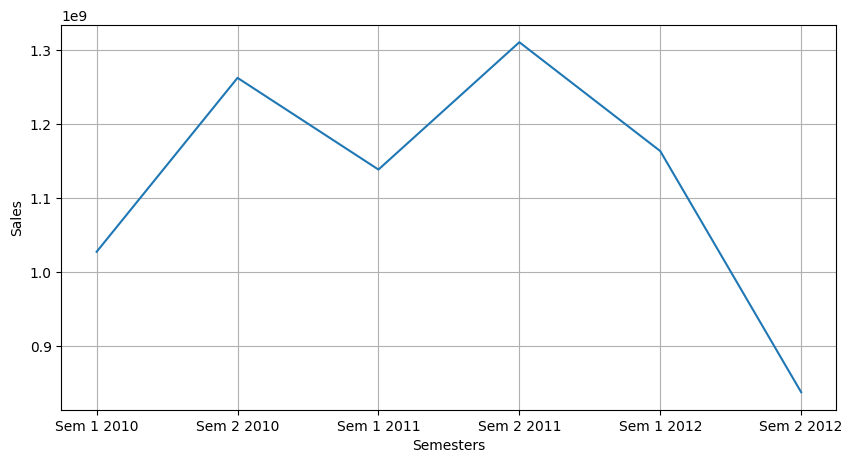

In [19]:
# Semester view of sales
semester_labels = ['Sem 1 2010', 'Sem 2 2010', 'Sem 1 2011', 'Sem 2 2011', 'Sem 1 2012', 'Sem 2 2012']
semester_sales = []
semester_sales.append(data[data['Year']==2010].loc[data['Month']<7, ['Weekly_Sales']].sum())
semester_sales.append(data[data['Year']==2010].loc[data['Month']>6, ['Weekly_Sales']].sum())
semester_sales.append(data[data['Year']==2011].loc[data['Month']<7, ['Weekly_Sales']].sum())
semester_sales.append(data[data['Year']==2011].loc[data['Month']>6, ['Weekly_Sales']].sum())
semester_sales.append(data[data['Year']==2012].loc[data['Month']<7, ['Weekly_Sales']].sum())
semester_sales.append(data[data['Year']==2012].loc[data['Month']>6, ['Weekly_Sales']].sum())
plt.figure(figsize=(10,5))
plt.plot(semester_labels,semester_sales)
plt.xlabel('Semesters')
plt.ylabel('Sales')
plt.grid()

In [20]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year', 'Quarter'],
      dtype='object')

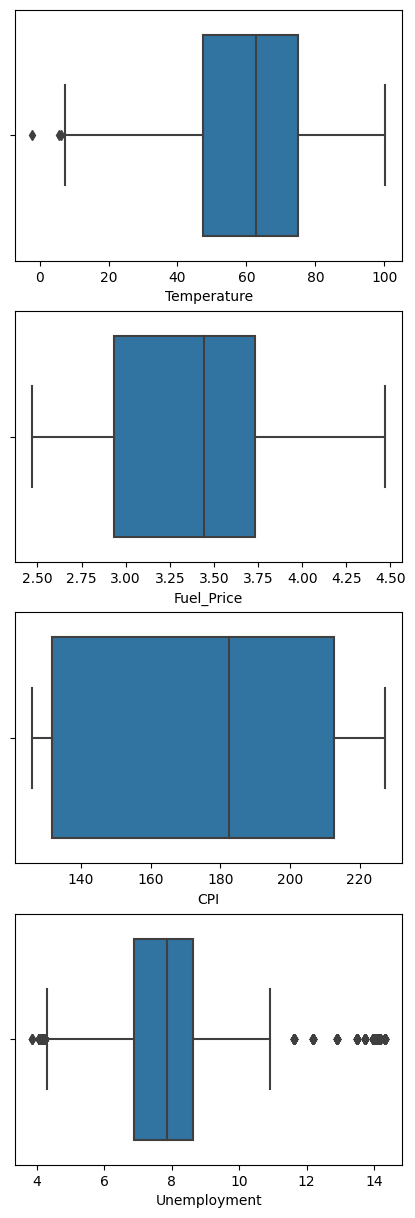

In [21]:
# Checking for outliers in data
fig, axs = plt.subplots(4, figsize=(5,15))
X = data[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
for i, column in enumerate(X):
 sns.boxplot(x=data[column], ax=axs[i])

Temparature and unemployment columns have outliers as seen in boxplot

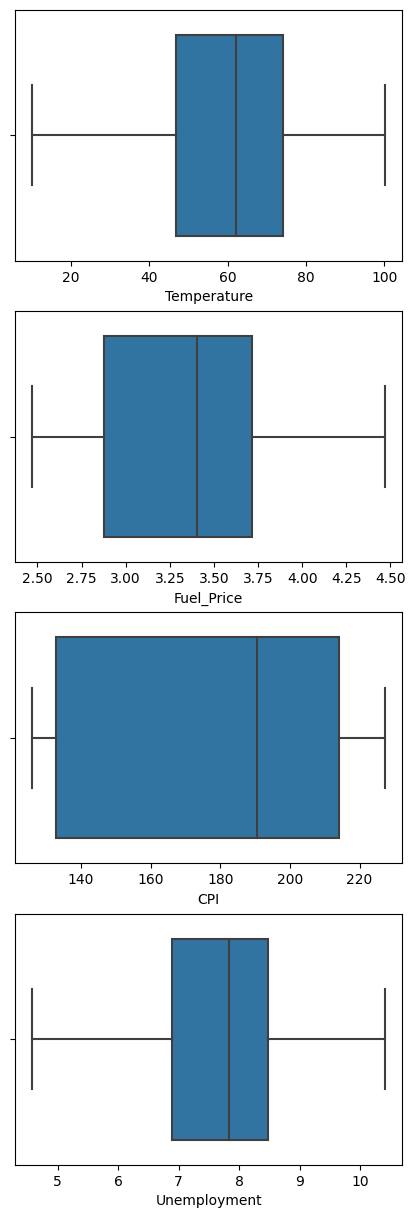

In [22]:
# Removing outliers from the data
data_cleaned = data[(data["Temperature"] > 10) & (data["Unemployment"] > 4.5) & (data["Unemployment"] < 10.5)]
# Checking if outliers are removed from the data
fig, axs = plt.subplots(4, figsize=(5,15))
X = data_cleaned[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]

for i, column in enumerate(X):
 sns.boxplot(x=data_cleaned[column], ax=axs[i])

### Statistical model

#### For Store 1 - Build prediction model to forecast demand
- Linear Regression - use variables like date and restructure dates (starting from earliest date in order)
- Change dates into dates by creating new variable

<Axes: >

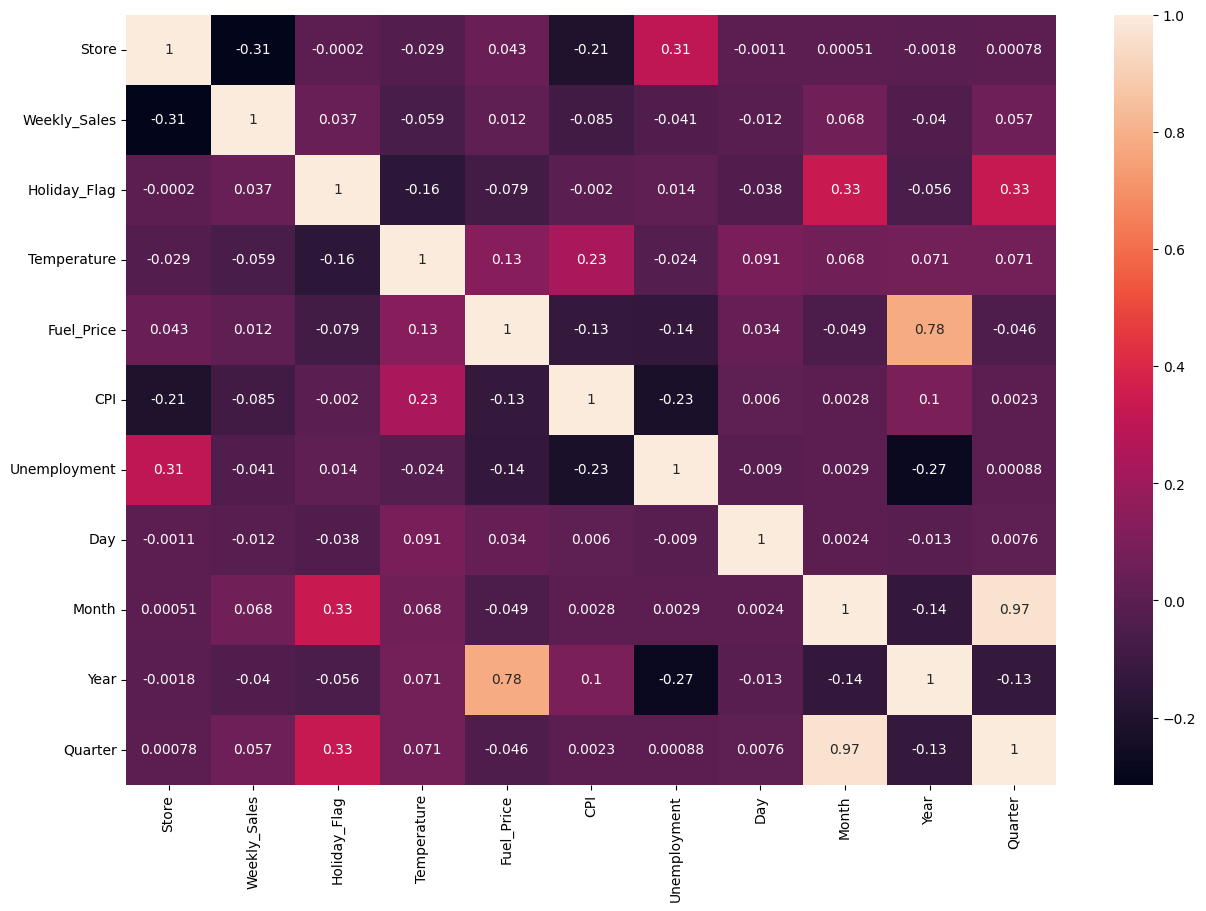

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(data_cleaned.corr(), annot=True)

Fuel price and year columns are more collinear

In [24]:
# Dropping more coolinear values
data_cleaned = data_cleaned.drop(['Year', 'Fuel_Price', 'Quarter', 'Date'], axis=1)

In [25]:
data_cleaned.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,CPI,Unemployment,Day,Month
0,1,1643690.90,0,42.31,211.096358,8.106,2,5
1,1,1641957.44,1,38.51,211.242170,8.106,2,12
2,1,1611968.17,0,39.93,211.289143,8.106,19,2
3,1,1409727.59,0,46.63,211.319643,8.106,26,2
4,1,1554806.68,0,46.50,211.350143,8.106,3,5


In [26]:
store1_data = data_cleaned[data_cleaned['Store']==1]

In [30]:
X = store1_data.drop(['Weekly_Sales', 'Store'], axis=1)
y = store1_data['Weekly_Sales']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

### Using Linear Regression Model

In [31]:
lr_model = LinearRegression()
lr_model.fit(X_train_sc, y_train)

# Predictions
y_pred = lr_model.predict(X_test_sc)

In [33]:
print('Accuracy:', lr_model.score(X_train_sc, y_train))
print('R2 Score:', metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy: 0.2144887450034043
R2 Score: 0.29794821764145285
RMSE: 130309.8736813564


### Using Random Forest Model

In [34]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train_sc, y_train)
y_pred = rf_model.predict(X_test_sc)

print('Accuracy:', rf_model.score(X_train_sc, y_train))
print('R2 Score:', metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy: 0.8567556812685759
R2 Score: 0.6745975653421263
RMSE: 88716.24460368074


RF proves to have more accuracy than linear regression